<a href="https://colab.research.google.com/github/Abintilas/CCTv-GunDetection/blob/main/2%20Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.4/709.4 kB 8.7 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")


100%|██████████| 6.23M/6.23M [00:00<00:00, 54.2MB/s]


In [7]:

!yolo detect val data='/content/drive/MyDrive/datasetDrone/data.yaml'  model='/content/drive/MyDrive/datasetDrone/runs/detect/train3/weights/best.pt'
!yolo detect val data='/content/drive/MyDrive/weaponsdata/data.yaml' model='/content/drive/MyDrive/weaponsdata/runs/detect/train10/weights/best.pt'



Ultralytics YOLOv8.1.10 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs
100% 755k/755k [00:00<00:00, 43.0MB/s]
val: Scanning /content/drive/MyDrive/datasetDrone/valid/labels.cache... 706 images, 0 backgrounds, 0 corrupt: 100% 706/706 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 45/45 [03:02<00:00,  4.06s/it]
                   all        706        770      0.843      0.627      0.773      0.536
              Airplane        706         85      0.827      0.647      0.809        0.6
                  Bird        706        109      0.801      0.553       0.67      0.505
                 Drone        706        452      0.782      0.881      0.873      0.554
            Helicopter        706        124      0.964      0.426       0.74      0.483
Speed: 4.8ms preprocess, 199.2ms inference, 0.0ms loss, 3.0ms postprocess per image
Res

In [80]:
model = YOLO('/content/drive/MyDrive/datasetDrone/runs/detect/train3/weights/best.pt')
model1 = YOLO('/content/drive/MyDrive/weaponsdata/runs/detect/train10/weights/best.pt')

source = 'https://images.financebuzz.com/696x400/filters:quality(70)/images/2022/01/24/man-with-drone.png'

results1 = model1(source)  # list of Results objects
results = model(source)  # list of Results objects



Found https://images.financebuzz.com/696x400/filters:quality(70)/images/2022/01/24/man-with-drone.png locally at man-with-drone.png
image 1/1 /content/man-with-drone.png: 384x640 1 person, 235.7ms
Speed: 3.6ms preprocess, 235.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

Found https://images.financebuzz.com/696x400/filters:quality(70)/images/2022/01/24/man-with-drone.png locally at man-with-drone.png
image 1/1 /content/man-with-drone.png: 384x640 2 Birds, 1 Drone, 217.8ms
Speed: 3.2ms preprocess, 217.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


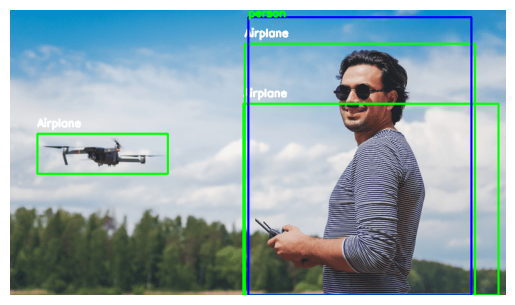

In [82]:
import cv2
import matplotlib.pyplot as plt

# Convert the image to OpenCV format
image = cv2.cvtColor(results[0].orig_img, cv2.COLOR_RGB2BGR)

# Get the bounding boxes for drone model
boxes_drone = results[0].boxes.xyxy.tolist()
d = results1[0].boxes.cls
f = d.numpy()
f [0]
g = f[0]
ssss= results[0].names[g]



# Draw the bounding boxes for drone model on the image
for box in boxes_drone:
    x1, y1, x2, y2 = box
    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    cv2.putText(image,str(ssss), (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

# Get the bounding boxes for weapons model
boxes_weapons = results1[0].boxes.xyxy.tolist()
a = results1[0].boxes.cls
b = a.numpy()
b[0]
c= b[0]
sssss= results1[0].names[c]
for box in boxes_weapons:
    x1, y1, x2, y2 = box
    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), 2)
    cv2.putText(image,str(sssss), (int(x1), int(y1) - 1), cv2.FONT_HERSHEY_SIMPLEX, 0.50, (0, 255, 0), 2)

# Display the image with bounding boxes
plt.imshow(image)
plt.axis('off')
plt.show()

In [62]:
a = results1[0].boxes.cls
b = a.numpy()
b[0]
c= b[0]

In [63]:
results1[0].names[c]

'person'

In [ ]:
box_weapons = results1[0].numpy

In [11]:
model = YOLO('/content/drive/MyDrive/datasetDrone/runs/detect/train3/weights/best.pt')
model1 = YOLO('/content/drive/MyDrive/weaponsdata/runs/detect/train10/weights/best.pt')

source = 'https://images.financebuzz.com/696x400/filters:quality(70)/images/2022/01/24/man-with-drone.png'

results_drone = model(source)
results_weapons = model1(source)
combined_results = combine_results(results_drone, results_weapons)




Found https://images.financebuzz.com/696x400/filters:quality(70)/images/2022/01/24/man-with-drone.png locally at man-with-drone.png
image 1/1 /content/man-with-drone.png: 384x640 2 Birds, 1 Drone, 180.5ms
Speed: 4.1ms preprocess, 180.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

Found https://images.financebuzz.com/696x400/filters:quality(70)/images/2022/01/24/man-with-drone.png locally at man-with-drone.png
image 1/1 /content/man-with-drone.png: 384x640 1 person, 154.7ms
Speed: 2.8ms preprocess, 154.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


AttributeError: 'list' object has no attribute 'xyxy'

In [ ]:
model.predict('https://images.financebuzz.com/696x400/filters:quality(70)/images/2022/01/24/man-with-drone.png', save=True, imgsz=320, conf=0.5)